In [1]:
!pip install pycaret[full]

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [8]:
import pandas as pd
data=pd.read_csv('/content/gdrive/MyDrive/DM_Assignment2/sales_data.csv')
data.head()

,Date,Sales
0,2019-01-31,152.921570
1,2019-02-28,165.895884
2,2019-03-31,232.376565
3,2019-04-30,310.311195
4,2019-05-31,326.758690


In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Sales
0,2019-01-31,152.921570
1,2019-02-28,165.895884
2,2019-03-31,232.376565
3,2019-04-30,310.311195
4,2019-05-31,326.758690


<Axes: >

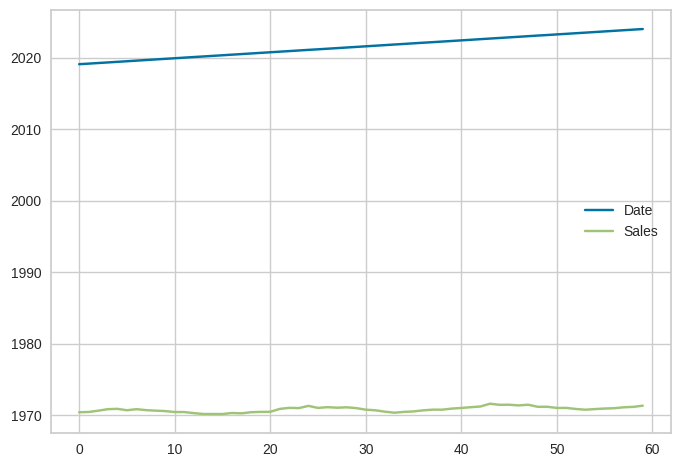

In [10]:
data.plot()

In [11]:
from pycaret.time_series import *
s = setup(data, fh = 10, use_gpu=True,target='Sales')

,Description,Value
0,session_id,3559
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(60, 2)"
5,Transformed data shape,"(60, 2)"
6,Transformed train set shape,"(50, 2)"
7,Transformed test set shape,"(10, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [12]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,60.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,302.300019
3,Summary,Statistics,Transformed,Median,,312.810291
4,Summary,Statistics,Transformed,Standard Deviation,,132.57297
5,Summary,Statistics,Transformed,Variance,,17575.592346
6,Summary,Statistics,Transformed,Kurtosis,,-0.734959
7,Summary,Statistics,Transformed,Skewness,,0.033395
8,Summary,Statistics,Transformed,# Distinct Values,,60.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",184.504671


In [13]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,2.5436,2.3045,153.8793,168.1254,0.4802,0.4906,-5.1939,0.1800
grand_means,Grand Means Forecaster,2.5848,2.3002,158.9880,169.3535,0.4101,0.5106,-6.3862,0.0500
croston,Croston,2.7104,2.4463,165.6060,178.9906,0.4586,0.5466,-6.5819,0.0367
stlf,STLF,2.7487,2.4088,165.9693,176.9413,0.5583,0.5019,-6.2607,0.1000
snaive,Seasonal Naive Forecaster,2.8448,2.5327,172.5464,185.4606,0.5392,0.5494,-6.5385,0.1100


Processing:   0%|          | 0/105 [00:00<?, ?it/s]

In [14]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 24})

In [15]:
plot_model(best, plot = 'residuals')

In [16]:
predict_model(best, fh = 24)

,y_pred
50,433.8045
51,433.8045
52,433.8045
53,433.8045
54,433.8045
55,433.8045
56,433.8045
57,433.8045
58,433.8045
59,433.8045


In [17]:
best

NaiveForecaster()

In [21]:
plot_model(best,plot='acf')

In [22]:
save_model(best,model_name='TimeSeries_Uni')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 NaiveForecaster())]))]),
 'TimeSeries_Uni.pkl')